**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# * A Comparison of SVM, Logistic Regression and RandomForest Classifiers for Genre Multi-class Classification* 

## Abstract

This report presents and compares the performance of three approaches for music genre classification which are widely being used. The proposed techniques consists of feature engineering stage followed by classification stage which compares different parameters set for the classifer. Music genre classification is an important task and it finds its application in many tasks like in programs making cocktails that matches the music, generating dynamically images that matches music [2]. There are 10 genres present in the data and SVM[3], logistic regression[4] and RandomForest classifiers[5] are tested for ability to classify the songs in these 10 genres. In the first part, multi-classification is tested with accuracy measure and in the second part one vs rest classification is applied where algorithms are compared on the basis of log loss. The results showed that SVM with kernel as 'rbf' performed the best in the first and RandomForest classifier performed the best when one vs rest classification method was used. 


## 1. Introduction

The data analysis project involves identifying the genre of song and classifying it into 10 class labels. 
We as humans are good at classification and can tell the difference between classical and rap music within seconds. However, there are many people who still live with unclassified music libraries and one way to easily access large music collection is to tag them into various genres. Even though it might be easy to manually segregate these songs as humans, when it comes to thousands of song classification it can involve immense amount of human effort and time. Therefore, an automated classification is more cost and time effective process.  


There can also be other types of label such as artists, albums etc. but we are considering only 10 genres in this project for testing the effectiveness of algorithms at first. Once a good classifier is found, it can be generalized to other genres as well. The reason for choosing music genres for classification si that it is one of the most relevant ways to create classification of large music libraries. There were two sets of data sets used to create the classification, namely training and test data sets. Each song has 264 features denoting the components of the music such as timbre, pitch and rhythm. Songs which fall in same genre have similar values for their components which helps us in creating the distinction between various genre and classifying them. The training data consists of the genre labels, using these labelled training data we create a model used to classify the songs in our test dataset. However, songs having large differences in the feature values such as “Electronic” and “Country” are easier to be distinguished by the model but songs contained in “Rock vs Blues” are difficult to be classified due to similar feature values. 

## 2. Data analysis

Below we load the Training (4363 songs) and Test datasets (6544 songs) each consisting of 264 features. We have the label data for each of the song in training dataset belonging to 10 genres, where genre 1 => “Pop-Rock” has the highest number of entries of 2178 and genre 10 => “Blues” having only 86 number of entries. The data has also been tested for NAN values before uploading in order to avoid inconsistency in data. Following visualization of the data has been provided below to get a better understanding of the data: 
1.	Number of songs in each genre
2.	Histogram to view class label distribution 
3.	Correlation matrix to see feature correlation, for each music category Rhythm, Chroma and MFCCs. Yellow represents higher correlation and blue denoting the lowest correlation. 



In [2]:
# Import libraries
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import math
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

<a id='load_data'></a>
### Loading the dataset and creating the Train and Test datasets

Data is loaded in the dataframe from the files and data is tested if it has NAN values.


[Link to Section 3](#section_3)


In [3]:
# Load the data and cleanup
df_train = pd.read_csv("train_data.csv",header=None)
df_labels_train = pd.read_csv("train_labels.csv",header=None)
df_train["labels"] = df_labels_train[:]

### Checking  for NAN values in the dataset
x = df_train.isna().sum()
for x1 in x:
    if x1 != 0:
        print(x1)
df_test = pd.read_csv("test_data.csv",header=None)
# Taking only the features in X_train
X_train = df_train[list(range(264))]
# Assign labels to y_train
y_train = df_train['labels']
# filtered features initialized to X_train
# We will assign filtered features to the X_filteredfeatures_train
X_filteredfeatures_train = X_train
# Printing the frequency of each class
df_train['labels'].value_counts()

1     2178
2      618
3      326
6      260
4      253
5      214
8      195
7      141
9       92
10      86
Name: labels, dtype: int64

<a id='visualize_data'></a>
### Visualizing the data

1. Class labels distribution is visualized using the histogram.
2. Feature data is visualized with correlation matrix to see if any features are correlated with each other.

[Link to Section 3](#section_3)


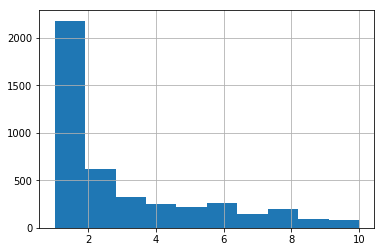

In [16]:
#Analysis of the input data
#Plotting the train data labels
#
#df_train.groupby('labels')['labels'].count().plot(title="Count of labels in the train dataset",kind='bar')
df_train['labels'].hist()
#for index in range(20):
    #ax = plt.gca()
#    scatter_plot_label_feature = df_train.plot(kind='scatter',x='labels',y=index,subplots=True)
#df_train.plot(kind='scatter',x='labels',y=12, color="red")

### Data Preprocessing
#### Feature correlation exploration
This will help to eliminate the correlated features as those will not add more value so keeping only one of the featrues out of those correlated

Feature vector of each song consists of 264 dimensions: 168 values for the rhythm patterns
48 values for the chroma 48 values for the MFCCs

That is why the correlation matrix is plotted for each of these three groups to see if any features within the same category are correlated. It is found from the graph that (chart 2) in the group 2 there are more correlated features from 100 to 160. Yellow shows more correlation. Hence, some method to reduce this redudant features can be employed. This might not lead to more accuracy or significant results as such but if the dataset is too huge in the future then reducing the dimension could definitely benefit.

[Link to Section 3](#section_3)

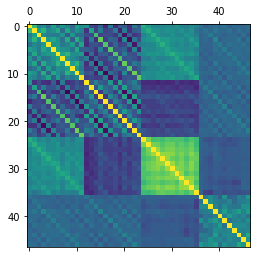

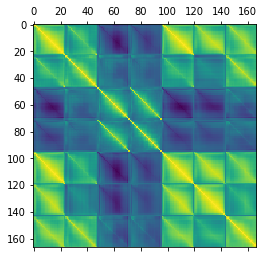

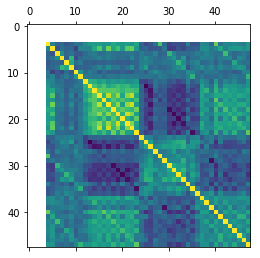

In [22]:

df_subset = df_train[list(range(168,215,1))]
plt.matshow(df_subset.corr())
df_subset = df_train[list(range(0,167,1))]
plt.matshow(df_subset.corr())
df_subset = df_train[list(range(216,264,1))]
plt.matshow(df_subset.corr())

<a id='filter_data'></a>
### Filtering the columns which are not correlated with the label column
As not all the columns might be correlated with the label columns. That means the columns which do not add value to the prediction of the label are found out in the following logic through the correlation matrix. Training and checking through this filtered train was done with taking only most correlated features with chi square correlation[1] of more than absolute of the correlation statistics of 0.05 , 0.1, 0.2 but none of those increased the accuracy more than when all the fetaures were taken. It did not improve the overall accuracy so this method was not taken into consideration for final model.

[Link to Section 3](#section_3)

In [17]:
from sklearn.feature_selection import chi2

import numpy as np
corr_matrix = df_train.corr()
corr_with_label = corr_matrix["labels"].sort_values(ascending=False)

top_correlated_features = []
for index in corr_with_label.index:
    if abs(corr_with_label[index]) >= 0.05:
        top_correlated_features.append(index)
print(len(top_correlated_features))
print(top_correlated_features[:10])
X_filteredfeatures_train = df_train[df_train.columns[top_correlated_features[1:]]]
#print(X_filteredfeatures_train)

191
['labels', 221, 239, 234, 233, 238, 231, 59, 60, 57]


In [4]:
## function for writing output
def write_output_accuracy(trained_model, data_to_predict, out_file):
    predictions = training_model.predict(data_to_predict, outfile)
    df_output = pd.DataFrame()
    df_output['Sample_id'] = range(1,len(data_to_predict)+1)
    df_output['Sample_label'] = predictions
    df_output.to_csv(out_file, index=False)

### Removing the columns which have almost same values 
There are columns where the value is same throughout the rows so the procedure implemented for this is to check if the values of 25th percentile, 50th percentile and 75th percentile are equal then those columns were eliminated. 

[Link to Section 3](#section_3)

In [5]:
columns_to_include = []

for i in X_train.columns:
    df_descrip = df_train[i].describe()
    if abs(df_descrip['25%'] - df_descrip['75%']) == 0 and abs(df_descrip['25%'] - df_descrip['50%']) == 0:
        continue
    columns_to_include.append(i)
print("Number of columns having almost similar values :")
print(str(len(X_train.columns) - len(columns_to_include)))
#print(columns_to_include)
X_filteredfeatures_train = df_train[df_train.columns[columns_to_include]]
df_test_filtered = df_test[df_test.columns[columns_to_include]]
#columns got eliminated
#[23, 47, 71, 119, 143, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263]

Number of columns having almost similar values :
20


<a id='normalize_data'></a>
### Normalize the data
While analysing the values for each feature we observed that there were values ranging from as high as 1milion to -0.002, therefore the decision to normalize the data was taken before creating the models. Normalization helped in improving the accuracy of each of the models.

[Link to Section 3](#section_3)

In [39]:
from sklearn import preprocessing
df_train_new = pd.DataFrame()
df_test_new = pd.DataFrame()
# Get column names first
names = X_filteredfeatures_train.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X_filteredfeatures_train)
df_train_new = pd.DataFrame(scaled_df, columns=names)

scaled_df = scaler.fit_transform(df_test_filtered)
df_test_new = pd.DataFrame(scaled_df, columns=names)

<a id='multiclassification'></a>
## Multiclass classification Implementation and results

### Resampling of the Data

To handle the imbalanced classes, resampling is done to get better confusion matrix where the predictions of other classes than the first one will perform better. Different  combinations were tried. Undersampling of Class 1 and over sampling of other classes was tried to improve the results in confusion matrix.

### Confusion Matrix for checking the performance of the model
As the classes are imbalanced, accuracy itself would not be that helpful to see if the performance is improving, so we get the confusion matrix which shows if for each class how many are being classified incorrectly. It can be seen clearly that class 1 has the most accuracy but few other classes are being misclassified more than it is classified correctly. Most of them are being classified to class 1 as the class 1 samples are more. That is why confusion matrix for the resampled data is again compared.


### Logistic Regression for Multiclass Classification

Accuracy is 73% for the testing dataset. But as the goal was to handle the imbalanced classes well and see their improvement, the f1 score is comapared with other classifier scores. F1 score has definitely increased compared to the case when resampling was not done. There the score was 59% and the new f1 score obtained is 73%.

Logistic regression fits the data to a curve or sigmoid function, consist of a loss function to determine how well the data fits the defined function. The task is to maximize the log-likelihood by gradient descent to fit the parameters. Here we use the default sigmoid function and C=1e5 to obtain optimum predictions for logistic regressor. 

### SVM Classifier for Multiclass Classification
Linear SVM ran on original normalized data gave the highest f1 score of 61% so grid search was ran for this to get better parameters for optimization and then after resampling on best parameters the SVM with C=10 and gamma=0.1 and kernel=rbf gave f1 score of 0.90 which gave best results in Kaggle as well.

SVM strives to achieve the optimum hyperplanes which categorises the data into the various classes. Linear SVM assumes that the data is linearly separable, but not always is the data linearly separable therefore we also used other kernels in SVM such as rbf and poly kernel. The other 2 important parameters while using the SVM are the C and gamma values. “C” is the penalty for misclassification, as we increase C it leads to larger error penalties which reduces bias, increases variance and creates more overfitting. Equivalently, smaller “C” increases bias, reduces variance and causes more underfitting. Higher values of gamma mean the data points are further apart, as we increase the gamma value we go towards data overfitting and lower gamma goes towards underfitting. 


### RandomForest Classifier for Multiclass Classification
RandomForest classifier gave 47% f1 score which was the least before and after resampling it increasd to 80% which is better than Logistic regression but it did not result in better results on kaggle as compared to logistic. It gave at max 59% accuracy as opposed to logistic regression which gave 61% on kaggle. 

Random forest is an ensemble method which builds random tress structure on the random samples of the data. The 3 most important parameters Random forest considers is the “n_estimators”, “max_features” and “max_depth, The higher values of “n_estimators” creates higher values of trees and more smoothing of data, it makes a predictiction by aggregating the individual trees predictions. The “max_features” specifies the maximum number of features in each node, smaller max_features yields more number of different trees by creating a random subset leading to more smoothing. Also, another parameter “max_depth” restricts the dept of  the tree created by random forest. Various values were tweaked for the Random forest classifier, however the final parameter used for the optimum training accuracy was for max_depth = 8 and n_estimators =80.

[Link to Section 3](#section_3)

### Running the models for normalized data

In [8]:
# Linear SVM

X_tl = df_train_new
y_tl = df_train['labels']

X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl,shuffle=True, test_size = 0.2, random_state = 45)

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
#predictions_svm = clf.predict(X_test)
accuracy_SVM = clf.score(X_test, y_test)
print(accuracy_SVM)
predic = clf.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))


from sklearn import linear_model 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
clf=linear_model.LogisticRegression(C=1e5)
#clf.fit(X_train,y_train)
#X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=1)
clf.fit(X_train, y_train)

accuracy_logReg = clf.score(X_test,y_test)
#accuracy_logReg = clf.score(X_train, y_train)
# Printing the accuracy for the logistic regression
print("Accuracy of Logistic Regression")
print(accuracy_logReg)
predic = clf.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))


from sklearn.ensemble import RandomForestClassifier

#gave 99 percent accuracy
#regr = RandomForestRegressor(max_depth=10, random_state=15,oob_score = True,n_estimators=60)
clf = RandomForestClassifier(max_depth=8, random_state=15,oob_score = False,n_estimators=80)
clf.fit(X_train, y_train)


#model1 = LogisticRegression(random_state=0)
accuracy_RF = clf.score(X_test, y_test)
# Printing the accuracy for the logistic regression
print("Accuracy of Random Forest")
print(accuracy_RF)
predic = clf.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

# 63% for LinearSVC, 59% for Logistic Regression , 57% for Random Forest

0.630011454754
             precision    recall  f1-score   support

          1       0.71      0.84      0.77       424
          2       0.64      0.58      0.60       118
          3       0.65      0.66      0.65        77
          4       0.53      0.48      0.50        56
          5       0.38      0.25      0.30        52
          6       0.47      0.26      0.33        54
          7       0.21      0.13      0.16        23
          8       0.30      0.19      0.23        37
          9       0.30      0.41      0.35        17
         10       0.18      0.13      0.15        15

avg / total       0.60      0.63      0.61       873

[[358  22   4   8   7   6   1   7   8   3]
 [ 34  68   7   3   1   2   1   0   1   1]
 [  9   7  51   0   4   3   0   0   1   2]
 [ 17   5   0  27   1   2   3   1   0   0]
 [ 17   1   5   7  13   2   3   1   2   1]
 [ 19   2   8   3   3  14   1   1   2   1]
 [ 10   2   0   2   2   0   3   4   0   0]
 [ 24   0   0   1   1   1   0   7   2   1]
 [

/home/dipika/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<a id='grid'></a>
### Grid Search for SVM

As the SVM gave best results above, to optimize even more, gridsearch was run to find the best parameters.
In our project we have tweaked various parameter of the support vector machine to find the optimum test accuracy. Grid search was used to do the tweaking and obtaining the optimum values of each of there parameters, regularization parameter C=10, and gamma =0.01 with “rbf” kernel was seen to provide the best accuracy.
The highest accuracy was achieved using this on Kaggle 0.63.

[Link to Section 3](#section_3)

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[1,10,100],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
grid.fit(X_train,y_train)
print(grid.best_params_)
predic = grid.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))
accuracy_SVM = grid


grid.score(X_test, y_test)
print(accuracy_SVM)
#{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   3.7s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV] ...................... C=1, gamma=1, kernel=linear, total=   4.6s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   4.8s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   7.6s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   7.6s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   7.7s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   3.7s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   4.2s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   9.4s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total= 2.2min
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total= 2.4min
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total= 3.9min
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   3.4s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   3.5s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   3.5s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 44.2min finished


{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
             precision    recall  f1-score   support

          1       0.66      0.90      0.76       424
          2       0.64      0.59      0.61       118
          3       0.72      0.68      0.70        77
          4       0.74      0.45      0.56        56
          5       0.63      0.23      0.34        52
          6       0.40      0.26      0.31        54
          7       0.00      0.00      0.00        23
          8       0.64      0.19      0.29        37
          9       0.58      0.41      0.48        17
         10       0.67      0.13      0.22        15

avg / total       0.63      0.65      0.62       873

[[382  21   3   2   4   8   0   2   1   1]
 [ 39  70   4   1   1   1   1   0   1   0]
 [ 12   6  52   0   1   4   0   1   1   0]
 [ 24   4   1  25   0   2   0   0   0   0]
 [ 28   3   4   2  12   1   0   0   2   0]
 [ 27   4   5   3   0  14   0   1   0   0]
 [ 18   2   1   0   0   2   0   0   0   0]
 [ 27   0   0   1

<a id='resample_data'></a>
## Resampling the data

Resampling the data as the method mentioned above. Undersampling genre 1 class and oversampling the rest of the classes proportionately. Different trials were tested to find the optimal choice of sampling numbers for classes.

[Link to Section 3](#section_3)

In [17]:
from sklearn.utils import resample
df_train_new['labels'] = df_train['labels'] 
# Separate majority and minority classes
df_train_majority = df_train_new[df_train_new['labels']==1]
df_train_majority = resample(df_train_majority, 
                                     replace=False,     # sample without replacement
                                     n_samples=(1400),    # to match majority class
                                     random_state=123)
df_minority = df_train_new[df_train_new['labels']==2]
df_train_minority = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=(1000),    # to make it close majority class
                                     random_state=123)
df_upsampled = pd.concat([df_train_majority, df_train_minority])
df_minority = df_train_new[df_train_new['labels']==3]
df_train_minority = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=(600),    # to make it close majority class
                                     random_state=123)
df_upsampled = pd.concat([df_upsampled, df_train_minority])
for i in range(4,11):
    df_minority = df_train_new[df_train_new['labels']==i]
    #size = int(0.9*len(df_minority))
    #print(len(df_minority) + size)
    size = 600
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=(size),    # to make it close majority class
                                     random_state=123) # reproducible results
    df_upsampled = pd.concat([df_upsampled, df_minority_upsampled])
X_tl = df_upsampled[names]
# Assign labels to y_train
y_tl = df_upsampled['labels'] 
labels = df_upsampled['labels'].unique()

In [18]:
# Linear SVM


X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, shuffle=True, test_size = 0.2, random_state = 45)

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
#predictions_svm = clf.predict(X_test)
accuracy_SVM = clf.score(X_test, y_test)
print("Linear SVC")
print(accuracy_SVM)
predic = clf.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))


from sklearn import linear_model 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
clf=linear_model.LogisticRegression(C=1e5)
#clf.fit(X_train,y_train)
#X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=1)
clf.fit(X_train, y_train)

accuracy_logReg = clf.score(X_test,y_test)
#accuracy_logReg = clf.score(X_train, y_train)
# Printing the accuracy for the logistic regression
print("Accuracy of Logistic Regression")
print(accuracy_logReg)
predic = clf.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))


from sklearn.ensemble import RandomForestClassifier

#gave 99 percent accuracy
#regr = RandomForestRegressor(max_depth=10, random_state=15,oob_score = True,n_estimators=60)
clf = RandomForestClassifier(max_depth=8, random_state=15,oob_score = False,n_estimators=80)
clf.fit(X_train, y_train)


#model1 = LogisticRegression(random_state=0)
accuracy_logReg = clf.score(X_test, y_test)
# Printing the accuracy for the logistic regression
print("Accuracy of Random Forest")
print(accuracy_logReg)
predic = clf.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

clf = svm.SVC(kernel="rbf", gamma=0.1, C=10)
clf.fit(X_train, y_train)


#model1 = LogisticRegression(random_state=0)
accuracy_logReg = clf.score(X_test, y_test)
# Printing the accuracy for the logistic regression
print("Accuracy of SVM parameters from grid search:")
print(accuracy_logReg)
predic = clf.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))# Linear SVM

#Note:#### By mistake the code was pasted twice so the results in the outcome below are repeated
#### Ignore the repeated resutls - the repeated code is deleted after the cell was ran


Linear SVC
0.709722222222
             precision    recall  f1-score   support

          1       0.64      0.61      0.63       275
          2       0.77      0.74      0.75       209
          3       0.73      0.79      0.76       107
          4       0.77      0.73      0.75       122
          5       0.65      0.56      0.61       124
          6       0.68      0.64      0.66       124
          7       0.58      0.50      0.54       105
          8       0.60      0.75      0.67       104
          9       0.82      0.97      0.89       130
         10       0.79      0.86      0.83       140

avg / total       0.71      0.71      0.71      1440

[[169  17   8   8  10   9  16  25   7   6]
 [ 14 154  13   7   4   8   4   1   2   2]
 [  3   6  84   1   4   3   1   1   3   1]
 [  5  11   0  89   2   6   2   2   0   5]
 [ 17   3   5   4  70   1   8   7   5   4]
 [ 15   5   1   2   2  79   2   5   8   5]
 [ 17   2   4   4   9   6  52   4   2   5]
 [ 13   0   0   0   6   2   1  78 

## One Vs the rest Classification Techniques and Comparison


<a id='onevsrest'></a>

### SVM Classifier for One Vs Rest Classification

SVM gave the loss of 1 for testing data and for validation data on kaggle gave 0.25 for test data.

### Logistic Regression for One Vs rest Classification
This gave 0.197 loss for validation data on kaggle and 1.145 loss for test data which is not much different from SVM Classifier.

### RandomForest Regressor for One Vs Rest Classifier
RandomForest Classifier gave 0.194 log loss for test data and 0.87 log loss for test data which is better than Logistic Regression classifier and SVM.

Resampling was applied to all of these, but this did not result in better results for One vs rest method of classification.

[Link to Section 3](#section_3)

In [32]:
#Finding the log loss
from decimal import Decimal
def find_loss(X_train, y_train, prob_train, clf):
    loss = 0
    train_prob = clf.predict_proba(X_train)
    oveVsRest_LR_train = clf.predict(X_train)
    #print("Dimension of train prob")
    #print(len(prob_train))
    #print(len(prob_train[0]))
    #print("Unique classes")
    #print(np.unique(y_train))
    indices = y_train.index
    for i in range(len(X_train)):
        #print(train_prob[i][y_train[i]-1])
        for j in np.unique(y_train):
            #print(indices[i])
            #print(i)
            #print(y_train[indices[i]])
            if y_train[indices[i]].any() == j:
                y = 1
            else:
                y = 0
            
            try:
                loss += y * math.log(Decimal(prob_train[i][j-1]))
            except:
                print("warning: log big value")
    loss = -loss/len(X_train)
    return loss
def write_output(test_probs, df_test,model_name):
    df_output_multi = pd.DataFrame(test_probs)

    df_output_multi.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9','Class_10']
    df_output_multi['Sample_id'] = range(1,len(df_test)+1)
    cols = df_output_multi.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df_output_multi = df_output_multi[cols]
    #print(df_output_multi.head())
    df_output_multi.to_csv('output_multiclass_'+ model_name +'.csv', index=False)

In [21]:
# Normalize the data
from sklearn import preprocessing
df_train_new = pd.DataFrame()
df_test_new = pd.DataFrame()
# Get column names first
names = X_filteredfeatures_train.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X_filteredfeatures_train)
df_train_new = pd.DataFrame(scaled_df, columns=names)

scaled_df = scaler.fit_transform(df_test_filtered)
df_test_new = pd.DataFrame(scaled_df, columns=names)

<a id='best_onevsrest'></a>
## Running models for normalized data

It turns out that the results for just the normalized data give the best results for one vs rest classification technique with Random Forest showing the least loss out of all.

[Link to Section 3](#section_3)

In [33]:

# splitting into test and train data
X_tl = df_train_new
y_tl = df_train['labels']

X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl,shuffle=True, test_size = 0.2, random_state = 45)
#SVC for one vs rest
from sklearn.multiclass import OneVsRestClassifier
#clf_SVC = OneVsRestClassifier(SVC(random_state=0,probability=True)).fit(X_train, y_train)
#oveVsRest_SVC = clf_SVC.predict(df_test_new)

#print("Method 2: Neural Network" + training_data_type)

print("Training Accuracy of SVC =", clf_SVC.score(X_test, y_test))
#val_probs = clf_SVC.predict_proba(df_test_new)
test_probs = clf_SVC.predict_proba(X_test)
loss = find_loss(X_test, y_test, test_probs, clf_SVC)
print("Loss for SVC")
print(loss)
# writing the output
#write_output(val_probs, df_test_new, 'SVC')


### Logistic Regression classifier
clf_log = OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train)
print("Training Accuracy of LogisticRegression =", clf_log.score(X_test, y_test))
#val_probs = clf_log.predict_proba(df_test_new)
test_probs = clf_log.predict_proba(X_test)
loss = find_loss(X_test, y_test, test_probs, clf_log)
print("Loss for Logistic Regression")
print(loss)
# writing the output
#write_output(val_probs, df_test_new, 'logistic_reg')


## Random ForestClassifier
from sklearn.ensemble import RandomForestClassifier
# estimators 100 max_depth = 10, => loss = 0.19430 train loss 0.4639
# estimators 100 max_depth = 11 => loss = 0.192 train loss 0.40 (didnt improve the above case)

estimator = RandomForestClassifier(n_estimators=80, max_depth=11,random_state=0)
clf_RF = OneVsRestClassifier(estimator).fit(X_train, y_train)
print("Training Accuracy of Random Forest =", clf_log.score(X_test, y_test))
#val_probs = clf_RF.predict_proba(df_test_new)
test_probs = clf_RF.predict_proba(X_test)
loss = find_loss(X_test, y_test, test_probs, clf_RF)
print("Loss for Random Forest Classifier")
print(loss)
# writing the output
#write_output(val_probs, df_test_new, 'random_forest')


Training Accuracy of SVC = 0.654066437572
Loss for SVC
1.0018141731118946
Training Accuracy of LogisticRegression = 0.633447880871
Loss for Logistic Regression
1.1451264748586785
Training Accuracy of Random Forest = 0.633447880871
Loss for Random Forest Classifier
0.8789479375869287


## Running the One vs Rest after resampling

In [37]:
from sklearn.utils import resample
df_train_new['labels'] = df_train['labels'] 
# Separate majority and minority classes
df_train_majority = df_train_new[df_train_new['labels']==1]
df_train_majority = resample(df_train_majority, 
                                     replace=False,     # sample without replacement
                                     n_samples=(1400),    # to match majority class
                                     random_state=123)
df_minority = df_train_new[df_train_new['labels']==2]
df_train_minority = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=(1000),    # to make it close majority class
                                     random_state=123)
df_upsampled = pd.concat([df_train_majority, df_train_minority])
df_minority = df_train_new[df_train_new['labels']==3]
df_train_minority = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=(600),    # to make it close majority class
                                     random_state=123)
df_upsampled = pd.concat([df_upsampled, df_train_minority])
for i in range(4,11):
    df_minority = df_train_new[df_train_new['labels']==i]
    #size = int(0.9*len(df_minority))
    #print(len(df_minority) + size)
    size = 600
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=(size),    # to make it close majority class
                                     random_state=123) # reproducible results
    df_upsampled = pd.concat([df_upsampled, df_minority_upsampled])
X_tl = df_upsampled[names]
# Assign labels to y_train
y_tl = df_upsampled['labels'] 
labels = df_upsampled['labels'].unique()

In [38]:

# splitting into test and train data

X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl,shuffle=True, test_size = 0.2, random_state = 45)
#SVC for one vs rest
from sklearn.multiclass import OneVsRestClassifier
#clf_SVC = OneVsRestClassifier(SVC(random_state=0,probability=True)).fit(X_train, y_train)
#oveVsRest_SVC = clf_SVC.predict(df_test_new)

#print("Method 2: Neural Network" + training_data_type)

print("Training Accuracy of SVC =", clf_SVC.score(X_test, y_test))
#val_probs = clf_SVC.predict_proba(df_test_new)
test_probs = clf_SVC.predict_proba(X_test)
loss = find_loss(X_test, y_test, test_probs, clf_SVC)
print("Loss for SVC")
print(loss)
# writing the output
#write_output(val_probs, df_test_new, 'SVC')


### Logistic Regression classifier
clf_log = OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train)
print("Training Accuracy of LogisticRegression =", clf_log.score(X_test, y_test))
#val_probs = clf_log.predict_proba(df_test_new)
test_probs = clf_log.predict_proba(X_test)
loss = find_loss(X_test, y_test, test_probs, clf_log)
print("Loss for Logistic Regression")
print(loss)
# writing the output
#write_output(val_probs, df_test_new, 'logistic_reg')


## Random ForestClassifier
from sklearn.ensemble import RandomForestClassifier
# estimators 100 max_depth = 10, => loss = 0.19430 train loss 0.4639
# estimators 100 max_depth = 11 => loss = 0.192 train loss 0.40 (didnt improve the above case)

estimator = RandomForestClassifier(n_estimators=80, max_depth=11,random_state=0)
clf_RF = OneVsRestClassifier(estimator).fit(X_train, y_train)
print("Training Accuracy of Random Forest =", clf_log.score(X_test, y_test))
#val_probs = clf_RF.predict_proba(df_test_new)
test_probs = clf_RF.predict_proba(X_test)
loss = find_loss(X_test, y_test, test_probs, clf_RF)
print("Loss for Random Forest Classifier")
print(loss)
# writing the output
#write_output(val_probs, df_test_new, 'random_forest')


Training Accuracy of SVC = 0.694078947368
Loss for SVC
1.429485472819865
Training Accuracy of LogisticRegression = 0.695394736842
Loss for Logistic Regression
2.420683747274537
Training Accuracy of Random Forest = 0.695394736842
Loss for Random Forest Classifier
2.0498378702410234


## 3. Methods and experiments

<a id='section_3'></a>
The method and process can be explained by the below sequential flow and diagram.

It is to be noted that this process was an iterative process to determine the best accuracy and loss function but for convinience purposes only the sequential flow has been shown. (Detailed explaination can be found for each of the section below: follow the link to go to relevant section) 

1. Loading Train and Test Data [--> Go To Section](#load_data) 
2. Data visualization with Histogram, Feature correlation matrix [--> Go To Section](#visualize_data) 
3. Feature Selection by removal of correlated column and similar value columns [--> Go To Section](#filter_data)
4. Normalize Data [--> Go To Section](#normalize_data) 
5. Resample Data [--> Go To Section](#resample_data) 
6. SVM (Best result) , Logistic Regression, Random Forest [--> Go To Section](#multiclassification) 
7. Grid search for SVM (Kernel= rbf, C=10, gamma=0.1) [--> Go To Section](#grid)
8. Resample vs. Non-resample for One vs Rest [--> Go To Section](#onevsrest)
9. SVM , Logistic Regression and Random Forest (Best result for one vs rest) [--> Go To Section](#best_onevsrest)

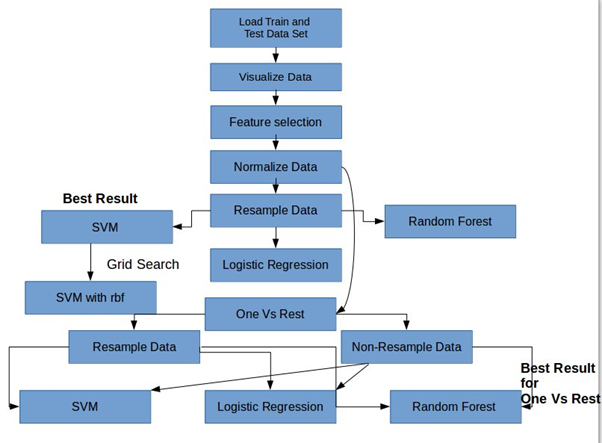

## 4. Results

Each of the model was evaluated using resampled training set of 7200 samples and a test set of 6544 test dataset songs with 244 features. 

While analysing the values for each feature we observed that there were values ranging from as high as 1milion to -0.002, therefore normalization was done on the data before creating the models. Normalization helped in improving the accuracy of each of the models. 

It was observed that from the class distribution histogram that there exists an imbalance in the class distribution. The class distribution for class 1 vs Other classes was almost 1:1 ratio resulting in misclassification resulting in prediction for most common class i.e. class 1/genre 1. Although there was high accuracy obtained, it turned out to be deluding or misleading on testing against the test dataset (Kaggle upload). This was also clearly seen when we created the confusion matrix. (Check above for confusion matrix provided for further details.) 

Oversampling and under sampling methods were used to resample the data to avoid the mispredictions. Class 1 was under-sampled to 1400 random resampling strategies without the replacement. Class 2 was over-sampled to 1000 random samples with replacement. Remaining classes from 3 to 10 were over-sampled to 600 random samples. It is important to note in this case, the sampling was purposely not kept at 1:1 ration for all classes. Since class 1 to class 10 ratio was almost 25:1, therefore too much oversampling for class 10 or too less under-sampling for class 1 meant losing quality of the data. We tried various permutation and combination for the resampling strategies before finalizing on the ones which we used for the models. 
The confusion matrix also proved to be extremely useful for analysing the misleading classification even though we achieved a high accuracy for test data.

The final accuracies on Kaggle : 

1. Challenge 1: Highest Accuracy obtained is 0.63 
2. Challenge 2: Lowest Log-loss obtained is 0.194 

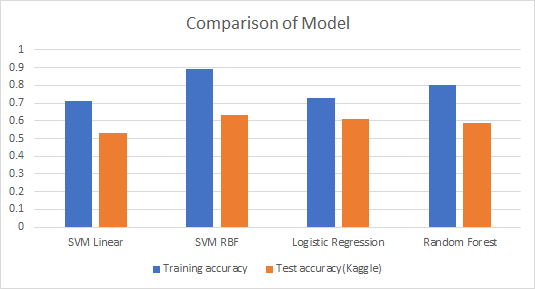

## 5. Discussion/Conclusions

After applying various machine learning techniques on the dataset to achieve the best possible accuracy for classification, the highest test(validation) accuracy was achieved by Support vector machine with fine tuned parameter and rbf kernel and the least log loss in One Vs. rest classification method was achieved in RandomForest Regressor. RandomForest regressor works better on imbalanced data so it can be seen from the results as well as in the second case the results were achieved without resampling itself. These obtained results can be further extended to more music tracks, where each music track can be turned into same features that were used for these models and classified into its respective genre.


Some of the limitation and further exploration to increase accuracy are as follows: 
1.	To further improve this accuracy we need more data, especially from the imbalanced classes such as class 9 and class 10. 
2.	Machine learning methods explored were only 3 namely Support vector machines, Random forest and logistic regression. Therefore, it can be further explored for various other techniques such as KNN, Neural networks etc.  
3.	Feature refining can also be considered, other relevant features of the songs can be obtained in order to increase the accuracy of classification. 
4.	Dive deeper into fine tuning grid parameters for each of the techniques used to better overcome underfitting or over-fitting of the data. 

## 6. References

1. Correlation matrix
https://datascienceplus.com/multi-class-text-classification-with-scikit-learn/
2. Music Genre Classification, Michael Haggblade, Yang Hong, Kenny Kao
http://cs229.stanford.edu/proj2011/HaggbladeHongKao-MusicGenreClassification.pdf
3. Li T, Ogihara M, Li Q. A Comparative study on content-based
music genre classification. In: Proceedings of the 26th annual
international ACM SI-GIR conference on research and development
in information retrieval. Toronto: ACM Press; 2003. p. 282–9
4. Music Genre Classification via Machine Learning, Li Guo(liguo94), Zhiwei Gu(zhiweig), Tianchi Liu(kitliu5)
https://pdfs.semanticscholar.org/f179/e8abd5c4752c36a3505fb5f3abfb483687ca.pdf
5. Classifying the Subjective: Determining Genre of Music From Lyrics, Ahmed Bou-Rabee, Keegan Go, Karanveer Mohan, 2012,
http://cs229.stanford.edu/proj2012/BourabeeGoMohan-ClassifyingTheSubjectiveDeterminingGenreOfMusicFromLyrics.pdf
6. for svm parameters
https://pdfs.semanticscholar.org/f179/e8abd5c4752c36a3505fb5f3abfb483687ca.pdf
7. For code snippets: 
http://scikit-learn.org/stable/ 
